In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_excel("StateCodeReduced.xlsx")

In [7]:
data.head()

,mw,code,temp,moisture,mvar,unit_no,mw_declare
0,350,SO,40,20.0,25,1,387
1,361,SO,51,16.0,33,1,387
2,373,LF1,34,20.0,51,3,387
3,377,LF1,47,17.0,51,3,403
4,375,SO,49,22.0,54,3,403


In [8]:
data['code'].value_counts()

SO     1285
LF1     633
LA       20
LP       15
PO       11
FA       11
FP        6
LD        1
Name: code, dtype: int64

In [9]:
data.isnull().sum()

mw            0
code          0
temp          0
moisture      0
mvar          0
unit_no       0
mw_declare    0
dtype: int64

In [10]:
data.corr()

,mw,temp,moisture,mvar,unit_no,mw_declare
mw,1.000000,0.181605,-0.108631,0.442904,0.479979,-0.199083
temp,0.181605,1.000000,-0.797736,0.279669,0.003285,0.076215
moisture,-0.108631,-0.797736,1.000000,-0.156405,-0.008763,-0.010247
mvar,0.442904,0.279669,-0.156405,1.000000,0.317014,0.033762
unit_no,0.479979,0.003285,-0.008763,0.317014,1.000000,-0.336532
mw_declare,-0.199083,0.076215,-0.010247,0.033762,-0.336532,1.000000


In [11]:
X = data[["mw","temp","moisture","mvar","mw_declare","unit_no"]]
y = data["code"]
y

0        SO
1        SO
2       LF1
3       LF1
4        SO
       ... 
1977    LF1
1978    LF1
1979     SO
1980     SO
1981     SO
Name: code, Length: 1982, dtype: object

In [12]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,mw,temp,moisture,mvar,mw_declare,unit_no
0,-0.988142,-0.097790,-0.858841,-0.648323,-0.002739,-1.537021
1,-0.476141,1.546014,-1.237092,0.045087,-0.002739,-1.537021
2,0.082406,-0.994410,-0.858841,1.605262,-0.002739,-0.766567
3,0.268588,0.948267,-1.142529,1.605262,1.096813,-0.766567
4,0.175497,1.247140,-0.669716,1.865291,1.096813,-0.766567
...,...,...,...,...,...,...
1977,0.501316,-0.097790,0.370474,0.651822,-0.002739,1.159569
1978,0.873680,0.798830,-0.669716,1.431909,-0.002739,1.544796
1979,0.780589,0.948267,-0.953404,1.605262,-0.002739,1.544796
1980,0.547861,1.396577,-0.953404,1.605262,-0.002739,1.544796


Text(0.5, 1.0, 'Success ')

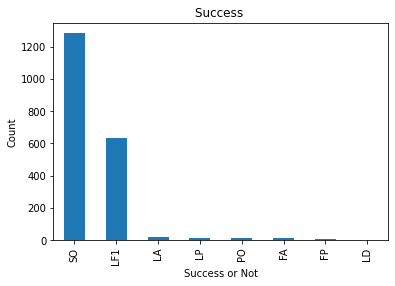

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
data.code.value_counts().plot(kind='bar')
plt.xlabel("Success or Not")
plt.ylabel("Count")
plt.title("Success ")

<AxesSubplot:xlabel='code', ylabel='count'>

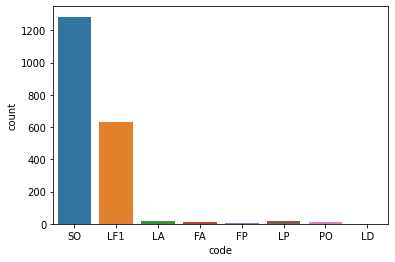

In [14]:
sns.countplot(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [27]:
#Setup a knn classifier with k neighbors
Model = KNeighborsClassifier(n_neighbors=7)

In [28]:
#Fit the model
Model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
Model.score(X_test,y_test) # Accuracy of the model

0.8319327731092437

In [30]:
y_pred=Model.predict(X_test)

In [31]:
Model.score(X_train,y_train) # Accuracy of the model

0.8579668348954578

In [32]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [33]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

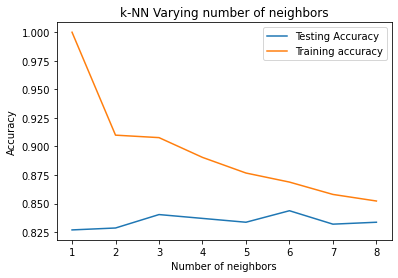

In [34]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [36]:
#Setup a knn classifier with k neighbors
Model = KNeighborsClassifier(n_neighbors=5)

In [37]:
#Fit the model
Model.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
Model.score(X_test,y_test) # Accuracy of the model

0.8336134453781513

In [39]:
y_pred=Model.predict(X_test)

In [40]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          FA       0.75      0.43      0.55         7
          FP       0.00      0.00      0.00         4
          LA       0.80      0.50      0.62         8
          LD       0.00      0.00      0.00         1
         LF1       0.81      0.73      0.77       196
          LP       0.50      0.67      0.57         3
          PO       0.29      1.00      0.44         2
          SO       0.86      0.91      0.88       374

    accuracy                           0.83       595
   macro avg       0.50      0.53      0.48       595
weighted avg       0.83      0.83      0.83       595



In [41]:
# Tuning Decision Tree Model
n_neighbors = [5,7,9,11,13,15,17,19,21]
weights = ["uniform","distance"]
metric = ["euclidean","manhattan","minkowski"]
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [42]:
knn = KNeighborsClassifier()
gs = GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.8348816598894798
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [43]:
Model = KNeighborsClassifier(metric='manhattan',n_neighbors= 5, weights='distance')

In [44]:
knn_acc = metrics.accuracy_score(y_test, y_pred)
print(knn_acc)

0.8336134453781513
